In [ ]:
#Please execute this cell
import jupman;

# Exam -  Mon 10, Feb 2020 EXERCISES

**Scientific Programming - Data Science @ University of Trento**

## [Download exercises and solutions](_static/generated/sciprog-ds-2020-02-10-exam.zip)


## Introduction

* **Taking part to this exam erases any vote you had before**


### What to do

1) Download  `sciprog-ds-2020-02-10-exam.zip` and extract it <b>on your desktop</b>. Folder content should be like this:

```
sciprog-ds-2020-02-10-FIRSTNAME-LASTNAME-ID
    exam-2020-02-10.ipynb
    B1-theory.txt
    B2_italian_queue_v2.py
    B2_italian_queue_v2_test.py            
    jupman.py
    sciprog.py                       
```

2) Rename `sciprog-ds-2020-02-10-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `sciprog-ds-2020-02-10-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions in this worksheet for each exercise. Every exercise should take max 25 mins. If it takes longer, leave it and try another exercise.

4) When done:

- if you have unitn login:  zip and send to [examina.icts.unitn.it/studente](http://examina.icts.unitn.it/studente)
  
- If you don't have unitn login: tell instructors and we will download your work manually
 


## Part A

Open Jupyter and start editing this notebook `exam-2020-02-10.ipynb`



 
> [WordNet](https://wordnet.princeton.edu/)® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of semantic relations. The resulting network of related words and concepts can be navigated with the browser. WordNet is also freely and publicly available for download, making it a useful tool for computational linguistics and natural language processing.
> Princeton University "About WordNet." [WordNet](https://wordnet.princeton.edu/). Princeton University. 2010    

In Python there are specialized libraries to read WordNet like [NLTK](https://www.nltk.org/howto/wordnet.html), but for the sake of this exercise, you will parse the noun database as a text file which can be read line by line.

We will focus on _names_ and how they are linked by _IS A_ relation, for example, a `dalmatian` _IS A_  `dog` (_IS A_ is also called _hypernym_ relation)

## A1 parse_db

First, you will begin with parsing an excerpt of wordnet `data/dogs.noun`, which is a noun database shown here in its entirety.

[According to documentation](https://wordnet.princeton.edu/documentation/wndb5wn), a noun database begins with several lines containing a copyright notice, version number, and license agreement: these lines all begin with **two spaces** and the line number like 

```
  1 This software and database is being provided to you, the LICENSEE, by  
  2 Princeton University under the following license.  By obtaining, using  
  3 and/or copying this software and database, you agree that you have  
```

Afterwards, each of following lines describe a noun synset, that is, a unique concept identified by a number called `synset_offset`.

- each synset can have many words to represent it - for example, the noun synset `02112993`  has `03` (`w_cnt`) words `dalmatian`  `coach_dog`, `carriage_dog`.
- a synset can be linked to other ones by relations. The dalmatian synset is linked to `002` (`p_cnt`) other synsets: to synset `02086723` by the `@` relation,  and to synset `02113184` by the `~` relation. For our purposes, you can focus on the `@` symbol which means _IS A_ relation (also called `hypernym`). If you search for a line starting with `02086723`, you will see it is the synset for `dog`, so Wordnet is telling us a `dalmatian` _IS A_ `dog`.


<div class="alert alert-warning">

**WARNING 1**: lines can be quite long so if they appear to span multiple lines don't be fooled : remember each name definition only occupies one single line with no carriage returns!

</div>


<div class="alert alert-warning">

**WARNING 2**: there are no empty lines between the synsets, here you see them just to visually separate the text blobs

</div>

```
  1 This software and database is being provided to you, the LICENSEE, by  
  2 Princeton University under the following license.  By obtaining, using  
  3 and/or copying this software and database, you agree that you have  
  4 read, understood, and will comply with these terms and conditions.:  
  5   
  6 Permission to use, copy, modify and distribute this software and  
  7 database and its documentation for any purpose and without fee or  
  8 royalty is hereby granted, provided that you agree to comply with  
  9 the following copyright notice and statements, including the disclaimer,  
  10 and that the same appear on ALL copies of the software, database and  
  11 documentation, including modifications that you make for internal  
  12 use or for distribution.  
  13   
  14 WordNet 3.1 Copyright 2011 by Princeton University.  All rights reserved.  
  15   
  16 THIS SOFTWARE AND DATABASE IS PROVIDED "AS IS" AND PRINCETON  
  17 UNIVERSITY MAKES NO REPRESENTATIONS OR WARRANTIES, EXPRESS OR  
  18 IMPLIED.  BY WAY OF EXAMPLE, BUT NOT LIMITATION, PRINCETON  
  19 UNIVERSITY MAKES NO REPRESENTATIONS OR WARRANTIES OF MERCHANT-  
  20 ABILITY OR FITNESS FOR ANY PARTICULAR PURPOSE OR THAT THE USE  
  21 OF THE LICENSED SOFTWARE, DATABASE OR DOCUMENTATION WILL NOT  
  22 INFRINGE ANY THIRD PARTY PATENTS, COPYRIGHTS, TRADEMARKS OR  
  23 OTHER RIGHTS.  
  24   
  25 The name of Princeton University or Princeton may not be used in  
  26 advertising or publicity pertaining to distribution of the software  
  27 and/or database.  Title to copyright in this software, database and  
  28 any associated documentation shall at all times remain with  
  29 Princeton University and LICENSEE agrees to preserve same. 
```

**01320032** 05 n 02 domestic_animal 0 domesticated_animal 0 007 @ 00015568 n 0000 ~ 01320304 n 0000 ~ 01320544 n 0000 ~ 01320872 n 0000 ~ 02086723 n 0000 ~ 02124460 n 0000 ~ 02125232 n 0000 | any of various animals that have been tamed and made fit for a human environment

**02085998** 05 n 02 canine 0 canid 0 011 @ 02077948 n 0000 #m 02085690 n 0000 + 02688440 a 0101 ~ 02086324 n 0000 ~ 02086723 n 0000 ~ 02116752 n 0000 ~ 02117748 n 0000 ~ 02117987 n 0000 ~ 02119787 n 0000 ~ 02120985 n 0000 %p 02442560 n 0000 | any of various fissiped mammals with nonretractile claws and typically long muzzles

**02086723** 05 n 03 dog 0 domestic_dog 0 Canis_familiaris 0 023 @ 02085998 n 0000 @ 01320032 n 0000 #m 02086515 n 0000 #m 08011383 n 0000 ~ 01325095 n 0000 ~ 02087384 n 0000 ~ 02087513 n 0000 ~ 02087924 n 0000 ~ 02088026 n 0000 ~ 02089774 n 0000 ~ 02106058 n 0000 ~ 02112993 n 0000 ~ 02113458 n 0000 ~ 02113610 n 0000 ~ 02113781 n 0000 ~ 02113929 n 0000 ~ 02114152 n 0000 ~ 02114278 n 0000 ~ 02115149 n 0000 ~ 02115478 n 0000 ~ 02115987 n 0000 ~ 02116630 n 0000 %p 02161498 n 0000 | a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds; "the dog barked all night"

**02106058** 05 n 01 working_dog 0 016 @ 02086723 n 0000 ~ 02106493 n 0000 ~ 02107175 n 0000 ~ 02109506 n 0000 ~ 02110072 n 0000 ~ 02110741 n 0000 ~ 02110906 n 0000 ~ 02111074 n 0000 ~ 02111324 n 0000 ~ 02111699 n 0000 ~ 02111802 n 0000 ~ 02112043 n 0000 ~ 02112177 n 0000 ~ 02112339 n 0000 ~ 02112463 n 0000 ~ 02112613 n 0000 | any of several breeds of usually large powerful dogs bred to work as draft animals and guard and guide dogs

**02112993** 05 n 03 dalmatian 0 coach_dog 0 carriage_dog 0 002 @ 02086723 n 0000 ~ 02113184 n 0000 | a large breed having a smooth white coat with black or brown spots; originated in Dalmatia

**02107175** 05 n 03 shepherd_dog 0 sheepdog 0 sheep_dog 0 012 @ 02106058 n 0000 ~ 02107534 n 0000 ~ 02107903 n 0000 ~ 02108064 n 0000 ~ 02108157 n 0000 ~ 02108293 n 0000 ~ 02108507 n 0000 ~ 02108682 n 0000 ~ 02108818 n 0000 ~ 02109034 n 0000 ~ 02109202 n 0000 ~ 02109314 n 0000 | any of various usually long-haired breeds of dog reared to herd and guard sheep

**02111324** 05 n 02 bulldog 0 English_bulldog 0 003 @ 02106058 n 0000 + 01121448 v 0101 ~ 02111567 n 0000 | a sturdy thickset short-haired breed with a large head and strong undershot lower jaw; developed originally in England for bull baiting

**02116752** 05 n 01 wolf 0 007 @ 02085998 n 0000 #m 02086515 n 0000 ~ 01324999 n 0000 ~ 02117019 n 0000 ~ 02117200 n 0000 ~ 02117364 n 0000 ~ 02117507 n 0000 | any of various predatory carnivorous canine mammals of North America and Eurasia that usually hunt in packs



### Field description

While parsing, skip the copyright notice. Then, each name definition follows the following format:

```
synset_offset lex_filenum ss_type w_cnt word lex_id [word  lex_id...] p_cnt [ptr...] | gloss 
```

* `synset_offset`: Number identifying the synset, for example `02112993`. **MUST be converted to a Python int**

* `lex_filenum`: Two digit decimal integer corresponding to the lexicographer file name containing the synset, for example `03`. **MUST be converted to a Python int**

* `ss_type`: One character code indicating the synset type, store it as a string.



* `w_cnt`: Two digit **hexadecimal** integer indicating the number of words in the synset, for example `b3`. **MUST be converted to a Python int**.

<div class="alert alert-warning">

**WARNING**: `w_cnt` is expressed as **hexadecimal**!

To convert an hexadecimal number like `b3` to a decimal int you will need to specify the base 16 like in `int('b3',16)` which produces the decimal integer `179`.
</div>

* Afterwards, there will be `w_cnt` words, each represented by two fields (for example, `dalmatian 0`). You MUST store these fields into a Python list called `words` containing a dictionary for each word, having these fields:

    - `word`: ASCII form of a word (example: `dalmatian`), with spaces replaced by underscore characters (`_`)

    - `lex_id`: One digit **hexadecimal** integer (example: `0`) that **MUST be converted to a Python int**

<div class="alert alert-warning">

**WARNING**: `lex_id` is expressed as **hexadecimal**!

To convert an hexadecimal number like `b3` to a decimal int you will need to specify the base 16 like in `int('b3',16)` which produces the decimal integer `179`.
</div>


* `p_cnt`: Three digit **decimal** integer indicating the number of pointers (that is, relations like for example _IS A_) from this synset to other synsets. **MUST be converted to a Python int** 

<div class="alert alert-warning">
**WARNING**: differently from `w_cnt`,  the value `p_cnt` is expressed as **decimal**!
</div>

* Afterwards, there will be `p_cnt` pointers, each represented by four fields `pointer_symbol` `synset_offset` `pos`  `source/target` (for example, `@ 02086723 n 0000`). **You MUST store these fields into a Python list called** `ptrs` containing a dictionary for each pointer, having these fields:

    - `pointer_symbol`: a symbol indicating the type of relation, for example `@` (which represents _IS A_ relation)
    - `synset_offset` : the identifier of the target synset, for example `02086723`. **You MUST convert this to a Python int**
    - `pos`: just parse it as a string (we will not use it)
    - `source/target`: just parse it as a string (we will not use it)

<div class="alert alert-warning">
    
**WARNING: DO NOT** assume first pointer is an `@` (_IS A_) !!

In the full database, the root synset _entity_ can't possibly have a parent synset:<br/><br/>


```


0        1  2 3  4      5 6   7 8        9 10   11 12      13 14   15 16       17 18
00001740 03 n 01 entity 0 003 ~ 00001930 n 0000 ~ 00002137 n  0000 ~  04431553 n  0000 | that which is perceived or known or inferred to have its own distinct existence (living or nonliving)

```
</div>

* `gloss`: Each synset contains a gloss (that is, a description). A gloss is represented as a vertical bar (`|`), followed by a text string that continues until the end of the line. For example, `a large breed having a smooth white coat with black or brown spots; originated in Dalmatia`

### implement parse_db

In [8]:
def parse_db(filename):
    """ Parses noun database filename as a text file and RETURN a dictionary containing 
        all the synset found. Each key will be a synset_offset mapping to a dictionary
        holding the fields of the correspoing synset. See next printout for an example.
    """
    ret = {}

    with open(filename) as r:
        line = r.readline()
        while line != '':
            if not line.startswith('  '):
                line, descr = line.split('|')
                line = line.split()
                synset_offset, lex_filenum, ss_type, w_count = line[0], int(line[1]), line[2], int(line[3], 16)
                words = line[4:4+(w_count * 2)]
                ret[synset_offset] = {}
                ret[synset_offset]['gloss'] = descr.rstrip()
                ret[synset_offset]['lex_filenum'] = lex_filenum
                ret[synset_offset]['ptrs'] = []
                n_of_ptrs = int(line[4 + w_count * 2])
                ret[synset_offset]['p_cnt'] = n_of_ptrs
                
                sliced_for_symbols = line[4 + 1 + w_count * 2:]
                start = 0
                lst_ptrs = []
                for i in range(n_of_ptrs):
                    el = sliced_for_symbols[start : start + 4]
                    tmp = {}
                    tmp['pointer_symbol'], tmp['pos'], tmp['source_target'], tmp['synset_offset'] = el[0], el[2], el[3], el[1]
                    ret[synset_offset]['ptrs'].append(tmp)
                    start += 4
                    
                ret[synset_offset]['ss_type'] = ss_type
                ret[synset_offset]['synset_offset'] = synset_offset
                ret[synset_offset]['w_cnt'] = w_count
                
                lst_word = []
                start = 0
                for i in range(w_count):
                    tmp = {}
                    el = words[start:i + start + 2]
                    tmp['lex_id'], tmp['word'] = el[1], el[0]
                    lst_word.append(tmp)
                    start += 2
                ret[synset_offset]['words'] = lst_word

            line = r.readline()

    return ret

In [9]:
dogs_db = parse_db('data/dogs.noun')

from pprint import pprint
#pprint(dogs_db)

## A2 to_adj

Implement a function `to_adj` which takes the parsed db and RETURN a graph-like data structure in  adjacency list format. Each node represent a synset - as label use the first word of the synset. A node is linked to another one if there is a _IS A_ relation among the nodes, so use the `@` symbol to filter the hypernyms.

**IMPORTANT**: not all linked synsets are present in the dogs excerpt.

**HINT**: If you couldn't implement the `parse_db` function properly, use as data the result of the previous print.

In [10]:
def to_adj(db):
    diz = {}
    
    for i in db:
        first_word = db[i]['words'][0]['word']
        diz[first_word] = []
        ptrs = db[i]['ptrs']
        for j in ptrs:
            if j['pointer_symbol'] == '@':
                x = j['synset_offset']
                if x in db:
                    diz[first_word].append(db[x]['words'][0]['word'])
    return diz

dogs_graph = to_adj(dogs_db)
from pprint import pprint
pprint(dogs_graph)

{'bulldog': ['working_dog'],
 'canine': [],
 'dalmatian': ['dog'],
 'dog': ['canine', 'domestic_animal'],
 'domestic_animal': [],
 'shepherd_dog': ['working_dog'],
 'wolf': ['canine'],
 'working_dog': ['dog']}



### Check results

If parsing is right, you should get the following graph

<div class="alert alert-warning">

**DO NOT** implement any drawing function, this is just for checking your results
</div>

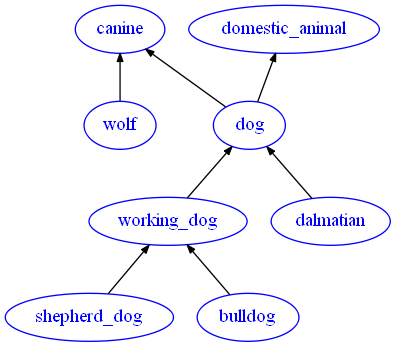

In [11]:
from sciprog import draw_adj
draw_adj(dogs_graph, options={'graph':{'rankdir':'BT'}})

## A.3 hist

You are given a dictionary mapping each relation symbol (i.e. `@`) to its description (i.e. `Hypernym`). 

Implement a function to draw the histogram of relation frequencies found in the relation links of the entire Wordnet, which can be loaded from the file `data/data.noun`. If you previously implemented `parse_db` in a correct way, you should be able to load the whole db. If for any reasons you can't, try at least to draw the histogram of frequencies found in `dogs_db`

- sort the histogram from greatest to lowest frequency
- do not count the relations containing the word 'domain' inside (upper/lowercase)
- do not count the '\\' relation
- display the relation names nicely, adding newlines if necessary

In [12]:
db = parse_db('data/data.noun')

In [89]:
import matplotlib.pyplot as plt

relation_names = {
    '!':'Antonym',
    '@':'Hypernym', 
    '@i':'Instance Hypernym',
    '~':'Hyponym',
    '~i':'Instance Hyponym',
    '#m':'Member holonym',
    '#s':'Substance holonym',
    '#p':'Part holonym',
    '%m':'Member meronym',
    '%s':'Substance meronym',
    '%p':'Part meronym',
    '=':'Attribute',
    '+':'Derivationally related form',
    ';c':'Domain of synset - TOPIC',           # DISCARD
    '-c':'Member of this domain - TOPIC',      # DISCARD
    ';r':'Domain of synset - REGION',          # DISCARD
    '-r':'Member of this domain - REGION',     # DISCARD
    ';u':'Domain of synset - USAGE',           # DISCARD
    '-u':'Member of this domain - USAGE',      # DISCARD
    '\\': 'Pertainym (pertains to noun)'       # DISCARD
}

def draw_hist(db):
    res = {}

    for i in db:
        for j in db[i]['ptrs']:
            symb = j['pointer_symbol']
            if 'domain' in relation_names[symb].lower() or symb == '\\':
                continue
            else:
                if symb not in res:
                    res[symb] = 1
                else:
                    res[symb] += 1

    l_of_tuple = []
    for i, j in res.items():
        l_of_tuple.append((relation_names[i], j))

    l_of_tuple.sort(key = lambda x : x[1], reverse = True)

    x = [i[0].replace(' ', '\n') for i in l_of_tuple]

    y = [i[1] for i in l_of_tuple]

    plt.figure(figsize = (18, 7))
    plt.title('Wordnet Relation frequency')
    plt.bar(x, y, 0.5, color = 'green')
    plt.show()

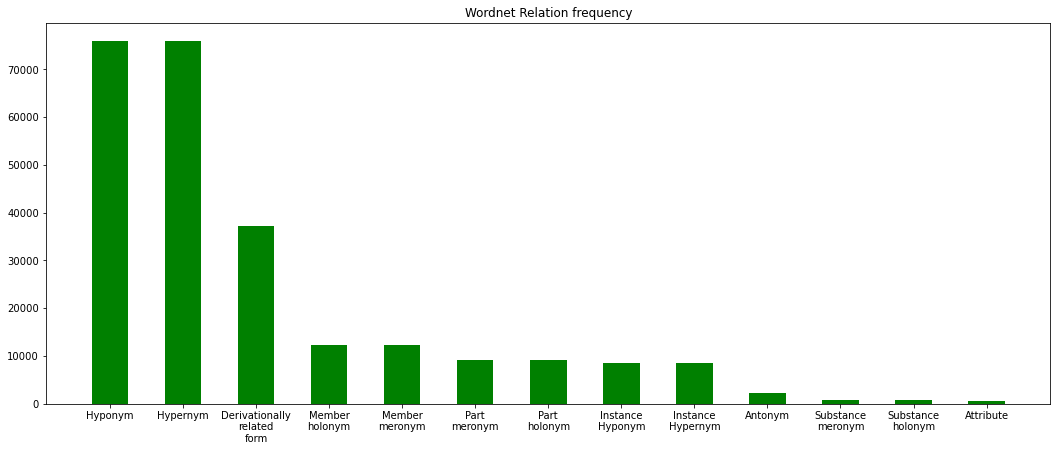

In [90]:
wordnet = parse_db('data/data.noun')  
draw_hist(wordnet)

## Part B

In [127]:
L = [1, 2, 3, 4, 5, 6, 7]

def my_fun(L):
    ret = []
    for i in range(len(L) - 3, -1, -1):
        ret.append(L[i] + L[i + 1] + L[i + 2])
    return ret

my_fun(L)

[18, 15, 12, 9, 6]

## B1 Theory

**Write the solution in separate `theory.txt` file**

### B1.1 complexity

Given a list 𝐿 of 𝑛 elements, please compute the asymptotic computational complexity of the following function, explaining your reasoning. Any ideas on how to improve the complexity of this code?

```python
def my_fun(L):
    n = len(L)
    out = []
    for i in range(n-2):
        out.insert(0,L[i] + L[i+1] + L[i+2])    
    return out
```

### B1.2 graph visits

Briefly describe the two classic ways of visiting the nodes of a graph.

## B2 ItalianQueue v2

**Open a text editor** and have a look at file `italian_queue_v2.py`

In the original v1 implementation of the ItalianQueue [we've already seen in class](https://sciprog.davidleoni.it/queues/queues.html#3.-ItalianQueue), `enqueue` can take $O(n)$: you will improve it by adding further indexing so it  runs in $O(1)$

An `ItalianQueue` is modelled as a LinkedList with two pointers, a `_head` and a `_tail`:

* an element is enqueued scanning from `_head` until a matching group is found, in which case the element is inserted after (that is, at the right) of the matching group, otherwise the element is appended at the very end marked by `_tail` 
* an element is dequeued from the `_head`


For this improved v2 version, you will use an additional dictionary `_tails` which associates to each group present in the queue the node at the tail of that group sequence. This way, instead of scanning you will be able to directly jump to insertion point.

```python
class ItalianQueue:
    
    def __init__(self):
        """ Initializes the queue. 
                
            - Complexity: O(1)
        """
        self._head = None
        self._tail = None
        self._tails = {}   #  <---- NEW  !
        self._size = 0
```

**Example**:

If we have the following situation:

```
   data  :  a -> b -> c -> d -> e -> f -> g -> h 
   group :  x    x    y    y    y    z    z    z
            ^    ^              ^              ^
            |    |              |              | 
            | _tails[x]      _tails[y]      _tails[z]
            |                                  |
          _head                             _tail
```

By calling 

```python
q.enqueue('i','y')
```

We get:


```
   data  :  a -> b -> c -> d -> e -> i -> f -> g -> h 
   group :  x    x    y    y    y    y    z    z    z
            ^    ^                   ^              ^
            |    |                   |              | 
            | _tails[x]           _tails[y]      _tails[z]
            |                                       |
          _head                                  _tail

```

We can see here the complete run:

In [ ]:
from italian_queue_v2_sol import *

q = ItalianQueue()
print(q)

In [ ]:
q.enqueue('a','x')   # 'a' is the element,'x' is the group

In [ ]:
print(q)

In [ ]:
q.enqueue('c','y')    # 'c' belongs to new group 'y', goes to the end of the queue

In [ ]:
print(q)

In [ ]:
q.enqueue('d','y')    # 'd' belongs to existing group 'y', goes to the end of the group

In [ ]:
print(q)

In [ ]:
q.enqueue('b','x')    # 'b' belongs to existing group 'x', goes to the end of the group

In [ ]:
print(q)

In [ ]:
q.enqueue('f','z')    # 'f' belongs to new group, goes at the end of the queue

In [ ]:
print(q)

In [ ]:
q.enqueue('e','y')   # 'e' belongs to an existing group 'y', goes at the end of the group

In [ ]:
print(q)

In [ ]:
q.enqueue('g','z')   # 'g' belongs to an existing group 'z', goes at the end of the group

In [ ]:
print(q)

In [ ]:
q.enqueue('h','z')  # 'h' belongs to an existing group 'z', goes at the end of the group

In [ ]:
print(q)

In [ ]:
q.enqueue('h','z')  # 'h' belongs to an existing group 'z', goes at the end of the group

In [ ]:
print(q)

In [ ]:
q.enqueue('i','y')  # 'i' belongs to an existing group 'y', goes at the end of the group

In [ ]:
print(q)

Dequeue is always from the head, without taking in consideration the group:

In [ ]:
q.dequeue()

In [ ]:
print(q)

In [ ]:
q.dequeue()   # removed last member of group 'x', key 'x' disappears from _tails['x']

In [ ]:
print(q)

In [ ]:
q.dequeue()

In [ ]:
print(q)

## B2.1 enqueue

Implement `enqueue`:



```python
    def enqueue(self, v, g):
        """ Enqueues provided element v having group g, with the following 
            criteria:
        
            Queue is scanned from head to find if there is another element 
            with a matching group:
                - if there is, v is inserted after the last element in the 
                  same group sequence (so to the right of the group)
                - otherwise v is inserted at the end of the queue

            - MUST run in O(1)
        """
```  

**Testing**: `python3 -m unittest italian_queue_test.EnqueueTest`

## B2.2 dequeue

Implement `dequeue`:

```python
def dequeue(self):
        """ Removes head element and returns it.
            
            - If the queue is empty, raises a LookupError.
            - MUST perform in O(1)
            - REMEMBER to clean unused _tails keys
        """
```

<div class="alert alert-warning">

**IMPORTANT: you can test `dequeue` even if you didn't implement `enqueue` correctly**
</div>


**Testing**: `python3 -m unittest italian_queue_test.DequeueTest`

In [ ]:
import italian_queue_v2_test
jupman.run(italian_queue_v2_test)